# Reapply existing signatures

Simple example of fitting the provided example data to the 5 ES model

In [1]:
from enterosig import reapply, models
from enterosig.reapply import to_relative
import numpy as np

# The example data is quite large, so we'll take a subset of samples
result = reapply(
    abundance=models.example_abundance().iloc[:, :30], 
    model_w=models.five_es()
)

result.model_fit.describe()

count    30.000000
mean      0.797996
std       0.185145
min       0.203682
25%       0.763434
50%       0.862407
75%       0.930804
max       0.974751
Name: model_fit, dtype: float64

<Figure size 100x100 with 0 Axes>

The results object is a Decomposition class object. The Enterosignature weights for each sample are in the H matrix of the results object.

In [2]:
result.h.head()

,W2.35.ST,W1.41.ST,W2.42.ST,W1.39.ST,M1.61.ST,W2.63.ST,M2.57.ST,W1.4.ST,W2.62.ST,M1.4.ST,...,M1.8.ST,M1.22.ST,W2.41.ST,M1.42.ST,M2.48.ST,M2.45.ST,M1.57.ST,M1.7.ST,W2.15.ST,W2.1.ST
ES_Bact,1.088325e-03,0.000057,5.533855e-06,2.797162e-15,5.123730e-07,6.229886e-10,0.004115,0.000046,2.722732e-09,3.574854e-07,...,0.003263,0.000058,0.000003,6.657357e-06,4.341534e-09,0.000001,2.225087e-15,4.797380e-13,0.000007,0.000004
ES_Bifi,2.782562e-08,0.000582,2.067819e-03,6.447965e-03,9.524048e-05,2.168205e-03,0.000928,0.002982,2.041933e-03,9.187072e-04,...,0.000214,0.002657,0.007933,2.182078e-03,2.560817e-03,0.003537,7.972540e-03,5.524000e-03,0.000433,0.003986
ES_Esch,7.382243e-04,0.000032,1.588800e-02,1.233557e-03,4.232990e-03,3.159590e-02,0.005872,0.009373,8.463427e-03,1.656184e-02,...,0.000008,0.001206,0.000212,9.606466e-07,1.281523e-55,0.001170,1.588577e-03,3.838714e-03,0.005410,0.005888
ES_Prev,1.778084e-02,0.037536,3.071650e-02,2.887819e-02,3.282901e-02,9.902039e-03,0.016726,0.032152,3.528029e-02,2.825617e-02,...,0.031596,0.034639,0.027584,4.765720e-02,4.571417e-02,0.028051,3.394397e-02,3.282841e-02,0.023682,0.037678
ES_Firm,1.282287e-02,0.004567,2.772057e-15,5.027370e-03,4.772470e-03,1.433375e-03,0.010289,0.000661,1.094141e-03,2.411545e-04,...,0.006997,0.002479,0.006570,3.328116e-11,4.815893e-13,0.006333,5.031506e-04,2.041546e-03,0.005399,0.000022


We can get a scaled version of the H matrix (so each sample sums to 1), and visualise this using a mix of the inbuilt methods.

In [3]:
assert np.allclose(result.scaled('h').sum(), 1.0)
result.scaled('h')

,W2.35.ST,W1.41.ST,W2.42.ST,W1.39.ST,M1.61.ST,W2.63.ST,M2.57.ST,W1.4.ST,W2.62.ST,M1.4.ST,...,M1.8.ST,M1.22.ST,W2.41.ST,M1.42.ST,M2.48.ST,M2.45.ST,M1.57.ST,M1.7.ST,W2.15.ST,W2.1.ST
ES_Bact,3.355890e-02,0.001341,1.136832e-04,6.726035e-14,0.000012,1.381364e-08,0.108488,0.001016,5.807900e-08,0.000008,...,0.077542,0.001417,0.000066,1.335561e-04,8.993340e-08,0.000026,5.056070e-14,1.084578e-11,0.000200,0.000078
ES_Bifi,8.580131e-07,0.013607,4.247966e-02,1.550473e-01,0.002271,4.807602e-02,0.024471,0.065944,4.355678e-02,0.019981,...,0.005094,0.064743,0.187546,4.377560e-02,5.304645e-02,0.090492,1.811602e-01,1.248851e-01,0.012395,0.083773
ES_Esch,2.276342e-02,0.000748,3.263907e-01,2.966203e-02,0.100953,7.005817e-01,0.154804,0.207304,1.805346e-01,0.360210,...,0.000178,0.029386,0.005003,1.927195e-05,2.654630e-54,0.029922,3.609727e-02,8.678460e-02,0.154878,0.123762
ES_Prev,5.482788e-01,0.877526,6.310159e-01,6.944029e-01,0.782944,2.195597e-01,0.440968,0.711110,7.525692e-01,0.614555,...,0.750898,0.844044,0.652075,9.560716e-01,9.469535e-01,0.717563,7.713094e-01,7.421756e-01,0.677965,0.791929
ES_Firm,3.953980e-01,0.106778,5.694698e-14,1.208878e-01,0.113819,3.178249e-02,0.271269,0.014626,2.333929e-02,0.005245,...,0.166288,0.060410,0.155310,6.676676e-10,9.975959e-12,0.161997,1.143310e-02,4.615471e-02,0.154562,0.000458


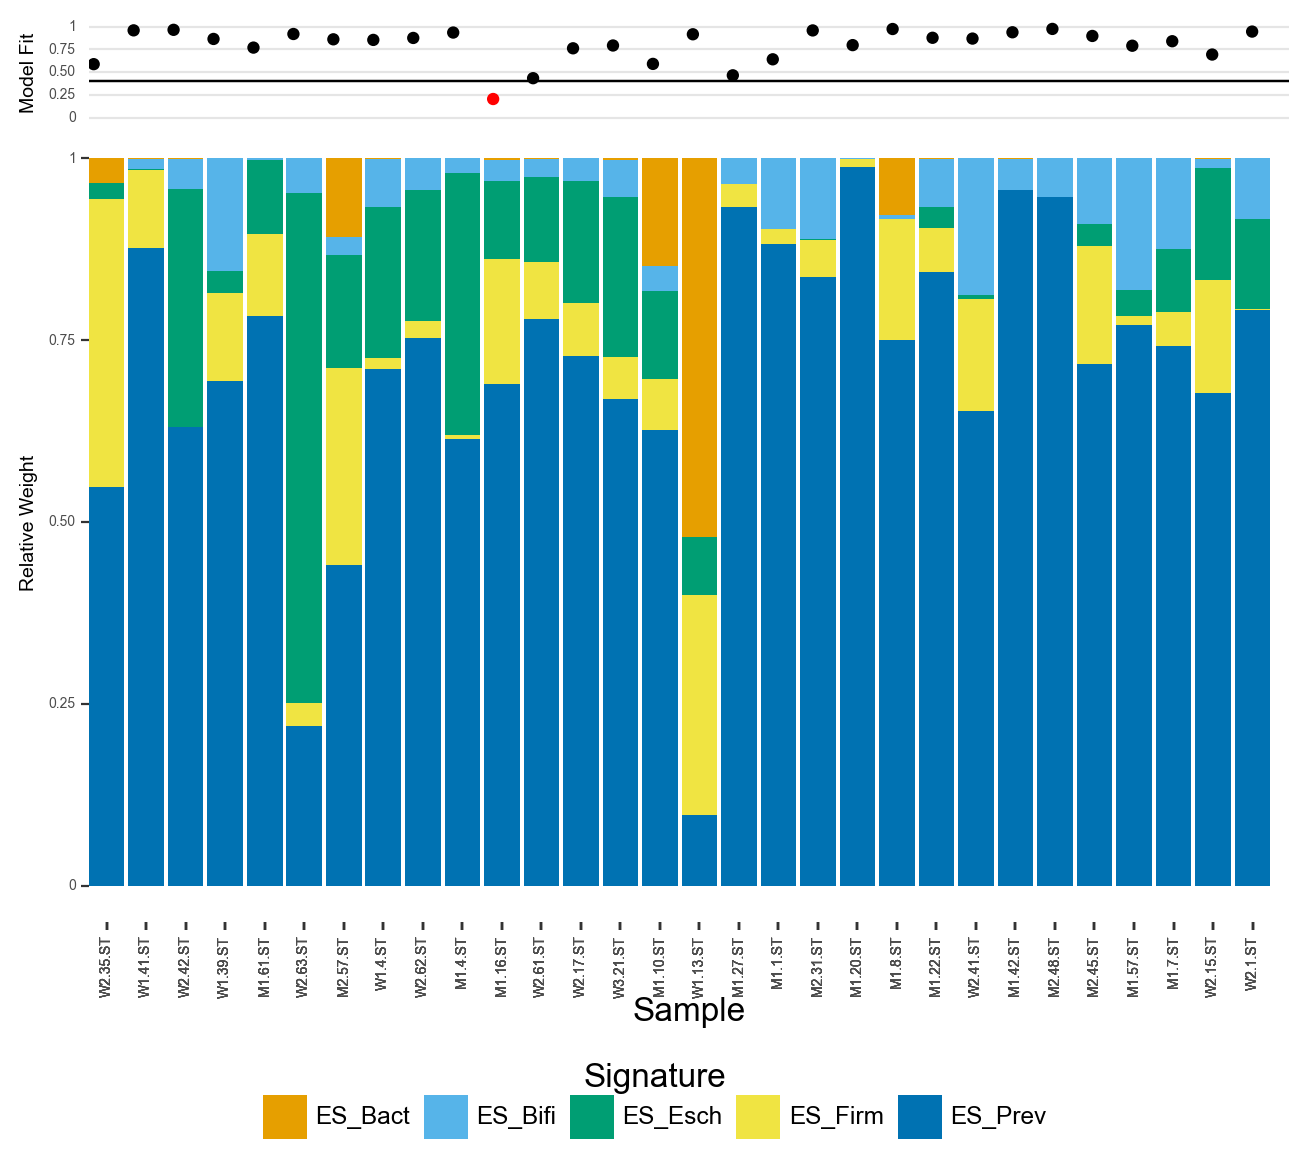

In [4]:
result.plot_relative_weight()

# De-novo signatures

We can attempt to discover signatures from new data. For these examples we will use a simple synthetic dataset with 4 signatures which slightly overlap.

In [5]:
import seaborn as sns
import pathlib
from enterosig.denovo import rank_selection, plot_rank_selection, decompositions, Decomposition

<Axes: >

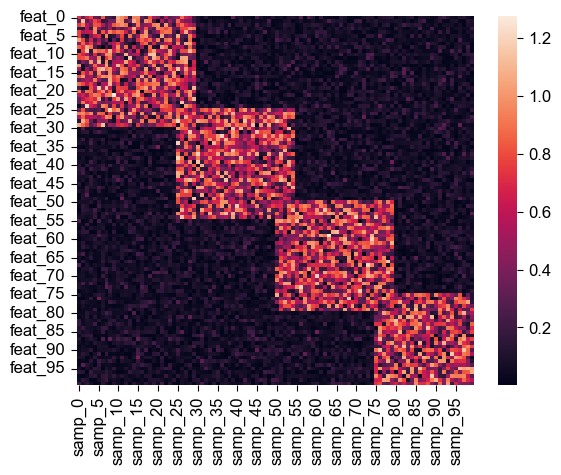

In [6]:
x = models.synthetic_data(overlap=0.2, k=4)
sns.heatmap(x)

## Rank selection
The number of ranks $k$ is unknown, however we can attempt to estimate it using bi-crossvalidation. This tries learning a held out part of the data using the other parts for a range of ranks a large number of times, and we look at measures of how well the held out part was estimated to identify a suitable rank. These are run from largest rank to smallest, so the estimate of time tends to start of conservative.

In [7]:
rank_sel_res = rank_selection(x=x, ranks=range(2, 11))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 900/900 [01:53<00:00,  7.96it/s]


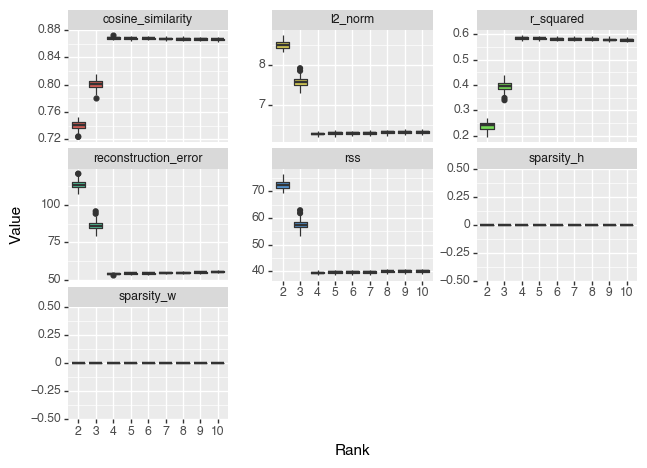

<Figure Size: (640 x 480)>

In [8]:
plot_rank_selection(rank_sel_res, jitter=False, n_col=3)

Cosine similarity increases rapidly at $k=4$, and declines after this, indicating this is a suitable rank. Real world examples will rarely be so clear, and often several ranks will appear suitable.

The different measures here are:
* *Cosine Similarity*: Higher is better. The angle between the true data and estimated data, considering each as a flattened 1d vector
* *L2 Norm*: Euclidean distance between true and estimated data. Lower is better.
* *R-squared*: Coefficient of determination between true and estimated data. Higher is better.
* *Reconstruction Error*: Measure of the error in the estimated data compared to true. Lower is better.
* *Residual Sum of Sqaures*: Lower is better
* *Sparsity H*: Sparsity of the H matrix
* *Sparsity W*: Sparsity of the W matrix

## Generating decompositions
For the ranks of interest, we can generate several decompositions to investigate. NMF solutions are non-unique and depend on the initialisation of the H and W matrices; some initialisations may give a better solution than others. One approach is to make many decompositions, and select those which optimise some criteria, such as reconstruction error.

Here we make 100 decompositions for each of ranks 3, 4, and 5, and keep only the top 5 for each rank. The result is a dictionary, with the key being the rank, and the value a list of Decompositions with the first being the best (lowest reconstruction error).

In [9]:
decomps = decompositions(x, ranks=[3, 4, 5], top_n=5, random_starts=100, seed=4928)
decomps

100%|██████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:02<00:00, 139.18it/s]


{3: [Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627]],
 4: [Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406]],
 5: [Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394]]}

We can inspect the decompositions using some inbuilt plotting functions

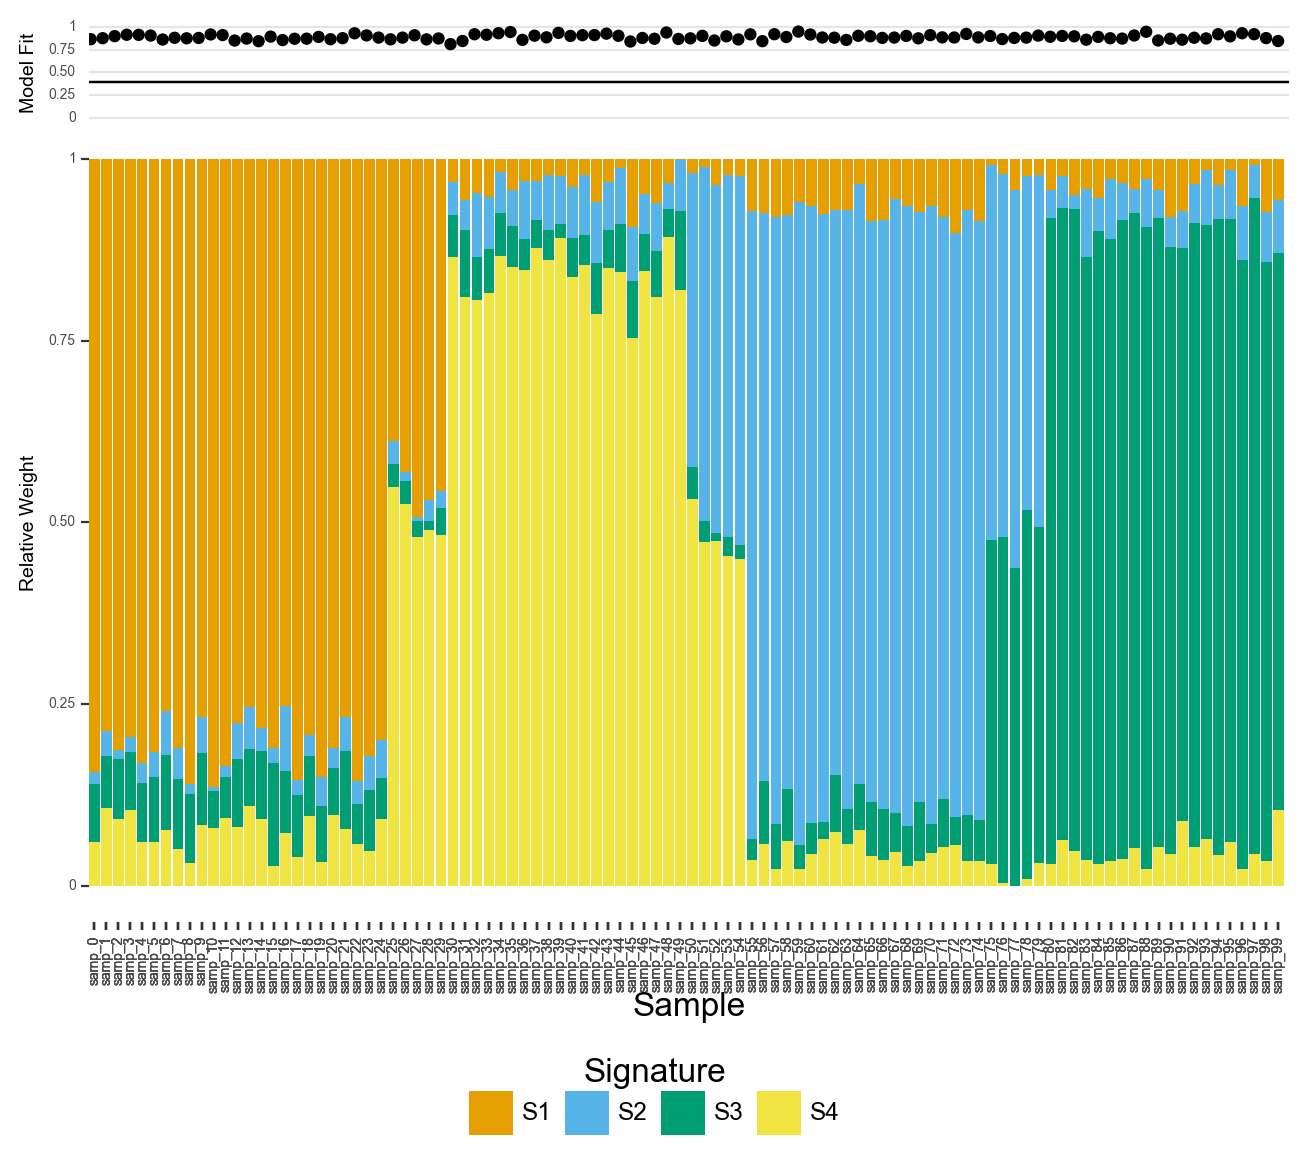

In [10]:
decomps[4][0].plot_relative_weight()

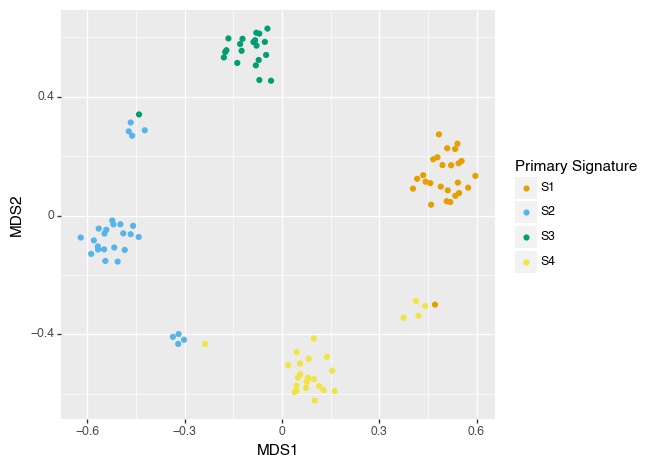

<Figure Size: (640 x 480)>

In [11]:
decomps[4][0].plot_pcoa()

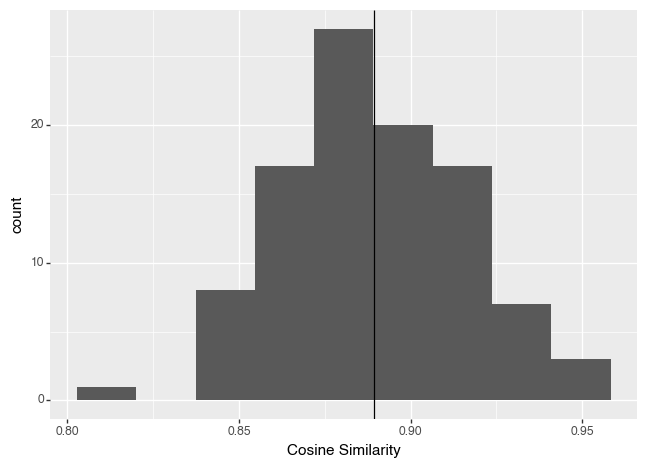

<Figure Size: (640 x 480)>

In [12]:
decomps[4][0].plot_modelfit()

## Slicing decompositions

We might be interested in visualising or analysis only a subset of a decomposition; perhaps we only want to look at one cohort of samples in a model, or only at some of the signatures. Decomposition objects can be indexed by sample, feature, and signature in that order. Normal slice syntax (1:5), lists of index names, or lists of index positions are supported. You can supply a mix of these.

This can also be used for abitrary reordering of samples and features for visualisations.

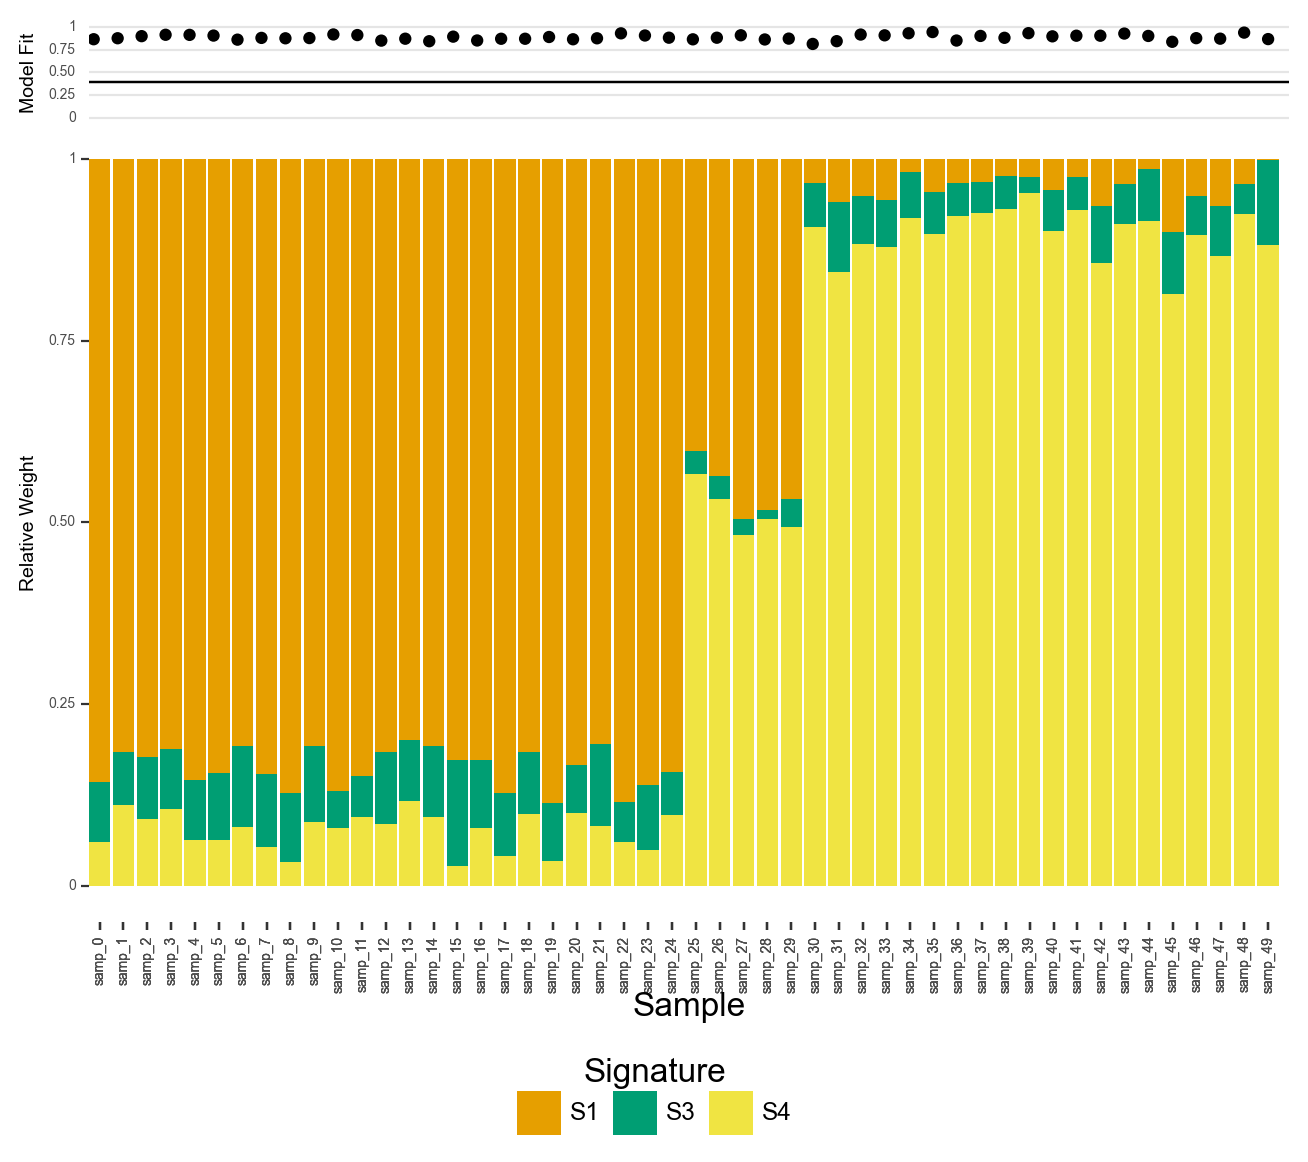

In [13]:
decomp_slcd = decomps[4][0][:50, :, ["S1", "S3", "S4"]]
decomp_slcd.plot_relative_weight()

Here we have restricted to just the first 50 samples, and only signatures S1, S3 and S4. In the full decomposition, S2is important to described many samples from samp_30 to samp_49, so the model fit for these is much poorer in this reduced model.

Another potential use for the slicing syntax is to reorder samples based on some metadata condition. The method is illustrated below with a random reordering.

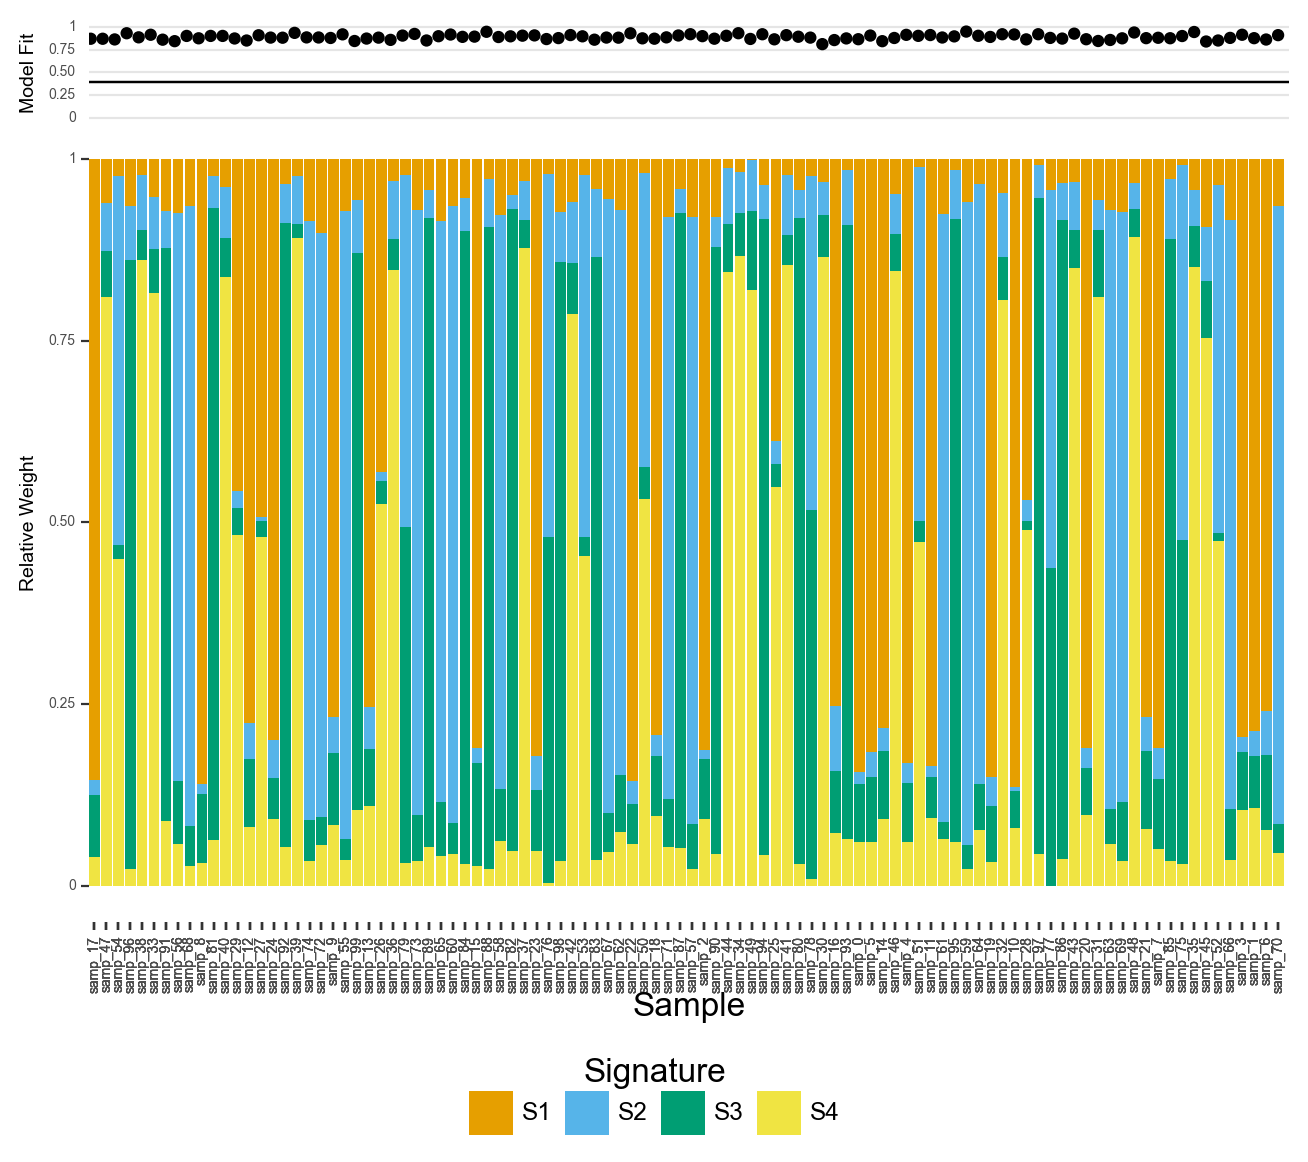

In [14]:
# Reorder samples - here we're just generating a random order
import random
new_order = list(range(decomps[4][0].h.shape[1]))
random.shuffle(new_order)

# Reorder the decomposition
decomps[4][0][new_order].plot_relative_weight()

## Saving and loading
Decompositions can be saved to disk for analysis in other environments, or saved and reloaded later.

In [15]:
Decomposition.save_decompositions(decomps, output_dir=pathlib.Path("test_save"), symlink=False)

In [16]:
! ls test_save/**/**

test_save/3/0:
h.tsv                         plot_relative_weight.pdf
h_scaled.tsv                  primary_signature.tsv
model_fit.tsv                 properties.yaml
monodominant_samples.tsv      quality_series.tsv
parameters.yaml               representative_signatures.tsv
plot_modelfit.pdf             w.tsv
plot_modelfit_point.pdf       w_scaled.tsv
plot_pcoa.pdf                 x.tsv

test_save/3/1:
h.tsv                         plot_relative_weight.pdf
h_scaled.tsv                  primary_signature.tsv
model_fit.tsv                 properties.yaml
monodominant_samples.tsv      quality_series.tsv
parameters.yaml               representative_signatures.tsv
plot_modelfit.pdf             w.tsv
plot_modelfit_point.pdf       w_scaled.tsv
plot_pcoa.pdf                 x.tsv

test_save/3/2:
h.tsv                         plot_relative_weight.pdf
h_scaled.tsv                  primary_signature.tsv
model_fit.tsv                 properties.yaml
monodominant_samples.tsv      quality_series.t

In [17]:
loaded_decomps = Decomposition.load_decompositions(in_dir=pathlib.Path("test_save"))
loaded_decomps

{3: [Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627],
  Decomposition[rank=3, beta_divergence=627]],
 4: [Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406],
  Decomposition[rank=4, beta_divergence=406]],
 5: [Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394],
  Decomposition[rank=5, beta_divergence=394]]}

In [18]:
! rm -rf test_save